In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
!ls female

female_000000.jpg female_001750.jpg female_003500.jpg female_005250.jpg
female_000001.jpg female_001751.jpg female_003501.jpg female_005251.jpg
female_000002.jpg female_001752.jpg female_003502.jpg female_005252.jpg
female_000003.jpg female_001753.jpg female_003503.jpg female_005253.jpg
female_000004.jpg female_001754.jpg female_003504.jpg female_005254.jpg
female_000005.jpg female_001755.jpg female_003505.jpg female_005255.jpg
female_000006.jpg female_001756.jpg female_003506.jpg female_005256.jpg
female_000007.jpg female_001757.jpg female_003507.jpg female_005257.jpg
female_000008.jpg female_001758.jpg female_003508.jpg female_005258.jpg
female_000009.jpg female_001759.jpg female_003509.jpg female_005259.jpg
female_000010.jpg female_001760.jpg female_003510.jpg female_005260.jpg
female_000011.jpg female_001761.jpg female_003511.jpg female_005261.jpg
female_000012.jpg female_001762.jpg female_003512.jpg female_005262.jpg
female_000013.jpg female_001763.jpg female_003513.jpg female_005

female_001494.jpg female_003244.jpg female_004994.jpg female_006744.jpg
female_001495.jpg female_003245.jpg female_004995.jpg female_006745.jpg
female_001496.jpg female_003246.jpg female_004996.jpg female_006746.jpg
female_001497.jpg female_003247.jpg female_004997.jpg female_006747.jpg
female_001498.jpg female_003248.jpg female_004998.jpg female_006748.jpg
female_001499.jpg female_003249.jpg female_004999.jpg female_006749.jpg
female_001500.jpg female_003250.jpg female_005000.jpg female_006750.jpg
female_001501.jpg female_003251.jpg female_005001.jpg female_006751.jpg
female_001502.jpg female_003252.jpg female_005002.jpg female_006752.jpg
female_001503.jpg female_003253.jpg female_005003.jpg female_006753.jpg
female_001504.jpg female_003254.jpg female_005004.jpg female_006754.jpg
female_001505.jpg female_003255.jpg female_005005.jpg female_006755.jpg
female_001506.jpg female_003256.jpg female_005006.jpg female_006756.jpg
female_001507.jpg female_003257.jpg female_005007.jpg female_006

In [11]:
from glob import glob

In [30]:
femalepath = glob('./female/*.jpg') #getting the path of the image file
malepath = glob('./male/*.jpg')

In [31]:
femalepath

['./female/female_003513.jpg',
 './female/female_005162.jpg',
 './female/female_001304.jpg',
 './female/female_001462.jpg',
 './female/female_005604.jpg',
 './female/female_003275.jpg',
 './female/female_005610.jpg',
 './female/female_003261.jpg',
 './female/female_000768.jpg',
 './female/female_001476.jpg',
 './female/female_006319.jpg',
 './female/female_001310.jpg',
 './female/female_004268.jpg',
 './female/female_003507.jpg',
 './female/female_002619.jpg',
 './female/female_005176.jpg',
 './female/female_006457.jpg',
 './female/female_001338.jpg',
 './female/female_000026.jpg',
 './female/female_004240.jpg',
 './female/female_002631.jpg',
 './female/female_005638.jpg',
 './female/female_002157.jpg',
 './female/female_003249.jpg',
 './female/female_004526.jpg',
 './female/female_000740.jpg',
 './female/female_006331.jpg',
 './female/female_000998.jpg',
 './female/female_000754.jpg',
 './female/female_006325.jpg',
 './female/female_002143.jpg',
 './female/female_004532.jpg',
 './fema

In [15]:
malepath

['./male/male_004254.jpg',
 './male/male_002625.jpg',
 './male/male_006443.jpg',
 './male/male_000032.jpg',
 './male/male_000754.jpg',
 './male/male_006325.jpg',
 './male/male_002143.jpg',
 './male/male_004532.jpg',
 './male/male_005638.jpg',
 './male/male_002157.jpg',
 './male/male_003249.jpg',
 './male/male_004526.jpg',
 './male/male_000740.jpg',
 './male/male_006331.jpg',
 './male/male_000998.jpg',
 './male/male_006457.jpg',
 './male/male_001338.jpg',
 './male/male_000026.jpg',
 './male/male_004240.jpg',
 './male/male_002631.jpg',
 './male/male_001310.jpg',
 './male/male_004268.jpg',
 './male/male_003507.jpg',
 './male/male_002619.jpg',
 './male/male_005176.jpg',
 './male/male_005610.jpg',
 './male/male_003261.jpg',
 './male/male_000768.jpg',
 './male/male_001476.jpg',
 './male/male_006319.jpg',
 './male/male_001462.jpg',
 './male/male_005604.jpg',
 './male/male_003275.jpg',
 './male/male_003513.jpg',
 './male/male_005162.jpg',
 './male/male_001304.jpg',
 './male/male_006480.jpg',
 

In [16]:
len(femalepath), len(malepath)

(7000, 7000)

In [76]:
# one image
path = femalepath[10]
img = cv2.imread(path)

In [77]:
img.shape

(106, 106, 3)

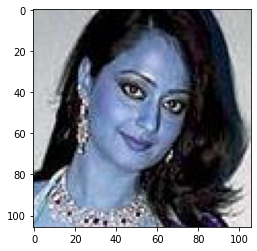

In [78]:
plt.imshow(img)
plt.show()

In [79]:
# BGR to gary scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(106, 106)

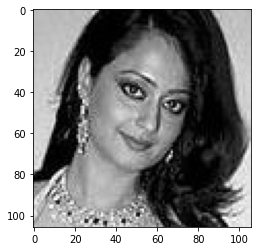

In [80]:
plt.imshow(gray, cmap = 'gray')

In [81]:
# load haar cascade classifier
haar = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [82]:
faces = haar.detectMultiScale(gray,1.3,5)
print(faces)

[[28 19 59 59]]


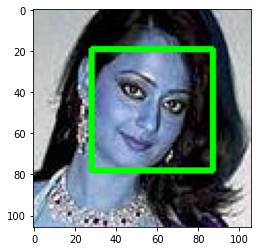

In [83]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)
plt.imshow(img)

In [88]:
# crop the image
crop_img = img[y:y+h, x:x+w]

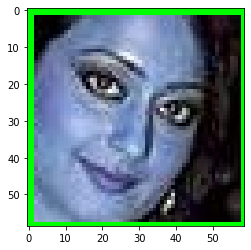

In [89]:
plt.imshow(crop_img)

In [90]:
cv2.imwrite('f_01.png', crop_img)

True

In [109]:
# Apply croppint to all images
def extract_image(path, gender, i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h, x:x+w]
        if gender == 'male':
            cv2.imwrite('./crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./crop/female_crop/{}_{}.png'.format(gender,i),roi)


In [111]:
extract_image(femalepath[10],'female', 1)

In [114]:
for i,path in enumerate(femalepath):
    try:
        extract_image(path,'female',i)
        print('INFO:{}/{} processed successfully'. format(i,len(femalepath)))
    except:
        print('INFO:{}/{} cannot be processed'. format(i, len(femalepath)))

INFO:0/7000 processed successfully
INFO:1/7000 processed successfully
INFO:2/7000 processed successfully
INFO:3/7000 processed successfully
INFO:4/7000 processed successfully
INFO:5/7000 processed successfully
INFO:6/7000 processed successfully
INFO:7/7000 processed successfully
INFO:8/7000 processed successfully
INFO:9/7000 processed successfully
INFO:10/7000 processed successfully
INFO:11/7000 processed successfully
INFO:12/7000 processed successfully
INFO:13/7000 processed successfully
INFO:14/7000 processed successfully
INFO:15/7000 processed successfully
INFO:16/7000 processed successfully
INFO:17/7000 processed successfully
INFO:18/7000 processed successfully
INFO:19/7000 processed successfully
INFO:20/7000 processed successfully
INFO:21/7000 processed successfully
INFO:22/7000 processed successfully
INFO:23/7000 processed successfully
INFO:24/7000 processed successfully
INFO:25/7000 processed successfully
INFO:26/7000 processed successfully
INFO:27/7000 processed successfully
IN

INFO:227/7000 processed successfully
INFO:228/7000 processed successfully
INFO:229/7000 processed successfully
INFO:230/7000 processed successfully
INFO:231/7000 processed successfully
INFO:232/7000 processed successfully
INFO:233/7000 processed successfully
INFO:234/7000 processed successfully
INFO:235/7000 processed successfully
INFO:236/7000 processed successfully
INFO:237/7000 processed successfully
INFO:238/7000 processed successfully
INFO:239/7000 processed successfully
INFO:240/7000 processed successfully
INFO:241/7000 processed successfully
INFO:242/7000 processed successfully
INFO:243/7000 processed successfully
INFO:244/7000 processed successfully
INFO:245/7000 processed successfully
INFO:246/7000 processed successfully
INFO:247/7000 processed successfully
INFO:248/7000 processed successfully
INFO:249/7000 processed successfully
INFO:250/7000 processed successfully
INFO:251/7000 processed successfully
INFO:252/7000 processed successfully
INFO:253/7000 processed successfully
I

INFO:450/7000 processed successfully
INFO:451/7000 processed successfully
INFO:452/7000 processed successfully
INFO:453/7000 processed successfully
INFO:454/7000 processed successfully
INFO:455/7000 processed successfully
INFO:456/7000 processed successfully
INFO:457/7000 processed successfully
INFO:458/7000 processed successfully
INFO:459/7000 processed successfully
INFO:460/7000 processed successfully
INFO:461/7000 processed successfully
INFO:462/7000 processed successfully
INFO:463/7000 processed successfully
INFO:464/7000 processed successfully
INFO:465/7000 processed successfully
INFO:466/7000 processed successfully
INFO:467/7000 processed successfully
INFO:468/7000 processed successfully
INFO:469/7000 processed successfully
INFO:470/7000 processed successfully
INFO:471/7000 processed successfully
INFO:472/7000 processed successfully
INFO:473/7000 processed successfully
INFO:474/7000 processed successfully
INFO:475/7000 processed successfully
INFO:476/7000 processed successfully
I

INFO:678/7000 processed successfully
INFO:679/7000 processed successfully
INFO:680/7000 processed successfully
INFO:681/7000 processed successfully
INFO:682/7000 processed successfully
INFO:683/7000 processed successfully
INFO:684/7000 processed successfully
INFO:685/7000 processed successfully
INFO:686/7000 processed successfully
INFO:687/7000 processed successfully
INFO:688/7000 processed successfully
INFO:689/7000 processed successfully
INFO:690/7000 processed successfully
INFO:691/7000 processed successfully
INFO:692/7000 processed successfully
INFO:693/7000 processed successfully
INFO:694/7000 processed successfully
INFO:695/7000 processed successfully
INFO:696/7000 processed successfully
INFO:697/7000 processed successfully
INFO:698/7000 processed successfully
INFO:699/7000 processed successfully
INFO:700/7000 processed successfully
INFO:701/7000 processed successfully
INFO:702/7000 processed successfully
INFO:703/7000 processed successfully
INFO:704/7000 processed successfully
I

INFO:906/7000 processed successfully
INFO:907/7000 processed successfully
INFO:908/7000 processed successfully
INFO:909/7000 processed successfully
INFO:910/7000 processed successfully
INFO:911/7000 processed successfully
INFO:912/7000 processed successfully
INFO:913/7000 processed successfully
INFO:914/7000 processed successfully
INFO:915/7000 processed successfully
INFO:916/7000 processed successfully
INFO:917/7000 processed successfully
INFO:918/7000 processed successfully
INFO:919/7000 processed successfully
INFO:920/7000 processed successfully
INFO:921/7000 processed successfully
INFO:922/7000 processed successfully
INFO:923/7000 processed successfully
INFO:924/7000 processed successfully
INFO:925/7000 processed successfully
INFO:926/7000 processed successfully
INFO:927/7000 processed successfully
INFO:928/7000 processed successfully
INFO:929/7000 processed successfully
INFO:930/7000 processed successfully
INFO:931/7000 processed successfully
INFO:932/7000 processed successfully
I

INFO:1132/7000 processed successfully
INFO:1133/7000 processed successfully
INFO:1134/7000 processed successfully
INFO:1135/7000 processed successfully
INFO:1136/7000 processed successfully
INFO:1137/7000 processed successfully
INFO:1138/7000 processed successfully
INFO:1139/7000 processed successfully
INFO:1140/7000 processed successfully
INFO:1141/7000 processed successfully
INFO:1142/7000 processed successfully
INFO:1143/7000 processed successfully
INFO:1144/7000 processed successfully
INFO:1145/7000 processed successfully
INFO:1146/7000 processed successfully
INFO:1147/7000 processed successfully
INFO:1148/7000 processed successfully
INFO:1149/7000 processed successfully
INFO:1150/7000 processed successfully
INFO:1151/7000 processed successfully
INFO:1152/7000 processed successfully
INFO:1153/7000 processed successfully
INFO:1154/7000 processed successfully
INFO:1155/7000 processed successfully
INFO:1156/7000 processed successfully
INFO:1157/7000 processed successfully
INFO:1158/70

INFO:1349/7000 processed successfully
INFO:1350/7000 processed successfully
INFO:1351/7000 processed successfully
INFO:1352/7000 processed successfully
INFO:1353/7000 processed successfully
INFO:1354/7000 processed successfully
INFO:1355/7000 processed successfully
INFO:1356/7000 processed successfully
INFO:1357/7000 processed successfully
INFO:1358/7000 processed successfully
INFO:1359/7000 processed successfully
INFO:1360/7000 processed successfully
INFO:1361/7000 processed successfully
INFO:1362/7000 processed successfully
INFO:1363/7000 processed successfully
INFO:1364/7000 processed successfully
INFO:1365/7000 processed successfully
INFO:1366/7000 processed successfully
INFO:1367/7000 processed successfully
INFO:1368/7000 processed successfully
INFO:1369/7000 processed successfully
INFO:1370/7000 processed successfully
INFO:1371/7000 processed successfully
INFO:1372/7000 processed successfully
INFO:1373/7000 processed successfully
INFO:1374/7000 processed successfully
INFO:1375/70

INFO:1568/7000 processed successfully
INFO:1569/7000 processed successfully
INFO:1570/7000 processed successfully
INFO:1571/7000 processed successfully
INFO:1572/7000 processed successfully
INFO:1573/7000 processed successfully
INFO:1574/7000 processed successfully
INFO:1575/7000 processed successfully
INFO:1576/7000 processed successfully
INFO:1577/7000 processed successfully
INFO:1578/7000 processed successfully
INFO:1579/7000 processed successfully
INFO:1580/7000 processed successfully
INFO:1581/7000 processed successfully
INFO:1582/7000 processed successfully
INFO:1583/7000 processed successfully
INFO:1584/7000 processed successfully
INFO:1585/7000 processed successfully
INFO:1586/7000 processed successfully
INFO:1587/7000 processed successfully
INFO:1588/7000 processed successfully
INFO:1589/7000 processed successfully
INFO:1590/7000 processed successfully
INFO:1591/7000 processed successfully
INFO:1592/7000 processed successfully
INFO:1593/7000 processed successfully
INFO:1594/70

INFO:1787/7000 processed successfully
INFO:1788/7000 processed successfully
INFO:1789/7000 processed successfully
INFO:1790/7000 processed successfully
INFO:1791/7000 processed successfully
INFO:1792/7000 processed successfully
INFO:1793/7000 processed successfully
INFO:1794/7000 processed successfully
INFO:1795/7000 processed successfully
INFO:1796/7000 processed successfully
INFO:1797/7000 processed successfully
INFO:1798/7000 processed successfully
INFO:1799/7000 processed successfully
INFO:1800/7000 processed successfully
INFO:1801/7000 processed successfully
INFO:1802/7000 processed successfully
INFO:1803/7000 processed successfully
INFO:1804/7000 processed successfully
INFO:1805/7000 processed successfully
INFO:1806/7000 processed successfully
INFO:1807/7000 processed successfully
INFO:1808/7000 processed successfully
INFO:1809/7000 processed successfully
INFO:1810/7000 processed successfully
INFO:1811/7000 processed successfully
INFO:1812/7000 processed successfully
INFO:1813/70

INFO:2015/7000 processed successfully
INFO:2016/7000 processed successfully
INFO:2017/7000 processed successfully
INFO:2018/7000 processed successfully
INFO:2019/7000 processed successfully
INFO:2020/7000 processed successfully
INFO:2021/7000 processed successfully
INFO:2022/7000 processed successfully
INFO:2023/7000 processed successfully
INFO:2024/7000 processed successfully
INFO:2025/7000 processed successfully
INFO:2026/7000 processed successfully
INFO:2027/7000 processed successfully
INFO:2028/7000 processed successfully
INFO:2029/7000 processed successfully
INFO:2030/7000 processed successfully
INFO:2031/7000 processed successfully
INFO:2032/7000 processed successfully
INFO:2033/7000 processed successfully
INFO:2034/7000 processed successfully
INFO:2035/7000 processed successfully
INFO:2036/7000 processed successfully
INFO:2037/7000 processed successfully
INFO:2038/7000 processed successfully
INFO:2039/7000 processed successfully
INFO:2040/7000 processed successfully
INFO:2041/70

INFO:2243/7000 processed successfully
INFO:2244/7000 processed successfully
INFO:2245/7000 processed successfully
INFO:2246/7000 processed successfully
INFO:2247/7000 processed successfully
INFO:2248/7000 processed successfully
INFO:2249/7000 processed successfully
INFO:2250/7000 processed successfully
INFO:2251/7000 processed successfully
INFO:2252/7000 processed successfully
INFO:2253/7000 processed successfully
INFO:2254/7000 processed successfully
INFO:2255/7000 processed successfully
INFO:2256/7000 processed successfully
INFO:2257/7000 processed successfully
INFO:2258/7000 processed successfully
INFO:2259/7000 processed successfully
INFO:2260/7000 processed successfully
INFO:2261/7000 processed successfully
INFO:2262/7000 processed successfully
INFO:2263/7000 processed successfully
INFO:2264/7000 processed successfully
INFO:2265/7000 processed successfully
INFO:2266/7000 processed successfully
INFO:2267/7000 processed successfully
INFO:2268/7000 processed successfully
INFO:2269/70

INFO:2471/7000 processed successfully
INFO:2472/7000 processed successfully
INFO:2473/7000 processed successfully
INFO:2474/7000 processed successfully
INFO:2475/7000 processed successfully
INFO:2476/7000 processed successfully
INFO:2477/7000 processed successfully
INFO:2478/7000 processed successfully
INFO:2479/7000 processed successfully
INFO:2480/7000 processed successfully
INFO:2481/7000 processed successfully
INFO:2482/7000 processed successfully
INFO:2483/7000 processed successfully
INFO:2484/7000 processed successfully
INFO:2485/7000 processed successfully
INFO:2486/7000 processed successfully
INFO:2487/7000 processed successfully
INFO:2488/7000 processed successfully
INFO:2489/7000 processed successfully
INFO:2490/7000 processed successfully
INFO:2491/7000 processed successfully
INFO:2492/7000 processed successfully
INFO:2493/7000 processed successfully
INFO:2494/7000 processed successfully
INFO:2495/7000 processed successfully
INFO:2496/7000 processed successfully
INFO:2497/70

INFO:2689/7000 processed successfully
INFO:2690/7000 processed successfully
INFO:2691/7000 processed successfully
INFO:2692/7000 processed successfully
INFO:2693/7000 processed successfully
INFO:2694/7000 processed successfully
INFO:2695/7000 processed successfully
INFO:2696/7000 processed successfully
INFO:2697/7000 processed successfully
INFO:2698/7000 processed successfully
INFO:2699/7000 processed successfully
INFO:2700/7000 processed successfully
INFO:2701/7000 processed successfully
INFO:2702/7000 processed successfully
INFO:2703/7000 processed successfully
INFO:2704/7000 processed successfully
INFO:2705/7000 processed successfully
INFO:2706/7000 processed successfully
INFO:2707/7000 processed successfully
INFO:2708/7000 processed successfully
INFO:2709/7000 processed successfully
INFO:2710/7000 processed successfully
INFO:2711/7000 processed successfully
INFO:2712/7000 processed successfully
INFO:2713/7000 processed successfully
INFO:2714/7000 processed successfully
INFO:2715/70

INFO:2915/7000 processed successfully
INFO:2916/7000 processed successfully
INFO:2917/7000 processed successfully
INFO:2918/7000 processed successfully
INFO:2919/7000 processed successfully
INFO:2920/7000 processed successfully
INFO:2921/7000 processed successfully
INFO:2922/7000 processed successfully
INFO:2923/7000 processed successfully
INFO:2924/7000 processed successfully
INFO:2925/7000 processed successfully
INFO:2926/7000 processed successfully
INFO:2927/7000 processed successfully
INFO:2928/7000 processed successfully
INFO:2929/7000 processed successfully
INFO:2930/7000 processed successfully
INFO:2931/7000 processed successfully
INFO:2932/7000 processed successfully
INFO:2933/7000 processed successfully
INFO:2934/7000 processed successfully
INFO:2935/7000 processed successfully
INFO:2936/7000 processed successfully
INFO:2937/7000 processed successfully
INFO:2938/7000 processed successfully
INFO:2939/7000 processed successfully
INFO:2940/7000 processed successfully
INFO:2941/70

INFO:3136/7000 processed successfully
INFO:3137/7000 processed successfully
INFO:3138/7000 processed successfully
INFO:3139/7000 processed successfully
INFO:3140/7000 processed successfully
INFO:3141/7000 processed successfully
INFO:3142/7000 processed successfully
INFO:3143/7000 processed successfully
INFO:3144/7000 processed successfully
INFO:3145/7000 processed successfully
INFO:3146/7000 processed successfully
INFO:3147/7000 processed successfully
INFO:3148/7000 processed successfully
INFO:3149/7000 processed successfully
INFO:3150/7000 processed successfully
INFO:3151/7000 processed successfully
INFO:3152/7000 processed successfully
INFO:3153/7000 processed successfully
INFO:3154/7000 processed successfully
INFO:3155/7000 processed successfully
INFO:3156/7000 processed successfully
INFO:3157/7000 processed successfully
INFO:3158/7000 processed successfully
INFO:3159/7000 processed successfully
INFO:3160/7000 processed successfully
INFO:3161/7000 processed successfully
INFO:3162/70

INFO:3357/7000 processed successfully
INFO:3358/7000 processed successfully
INFO:3359/7000 processed successfully
INFO:3360/7000 processed successfully
INFO:3361/7000 processed successfully
INFO:3362/7000 processed successfully
INFO:3363/7000 processed successfully
INFO:3364/7000 processed successfully
INFO:3365/7000 processed successfully
INFO:3366/7000 processed successfully
INFO:3367/7000 processed successfully
INFO:3368/7000 processed successfully
INFO:3369/7000 processed successfully
INFO:3370/7000 processed successfully
INFO:3371/7000 processed successfully
INFO:3372/7000 processed successfully
INFO:3373/7000 processed successfully
INFO:3374/7000 processed successfully
INFO:3375/7000 processed successfully
INFO:3376/7000 processed successfully
INFO:3377/7000 processed successfully
INFO:3378/7000 processed successfully
INFO:3379/7000 processed successfully
INFO:3380/7000 processed successfully
INFO:3381/7000 processed successfully
INFO:3382/7000 processed successfully
INFO:3383/70

INFO:3580/7000 processed successfully
INFO:3581/7000 processed successfully
INFO:3582/7000 processed successfully
INFO:3583/7000 processed successfully
INFO:3584/7000 processed successfully
INFO:3585/7000 processed successfully
INFO:3586/7000 processed successfully
INFO:3587/7000 processed successfully
INFO:3588/7000 processed successfully
INFO:3589/7000 processed successfully
INFO:3590/7000 processed successfully
INFO:3591/7000 processed successfully
INFO:3592/7000 processed successfully
INFO:3593/7000 processed successfully
INFO:3594/7000 processed successfully
INFO:3595/7000 processed successfully
INFO:3596/7000 processed successfully
INFO:3597/7000 processed successfully
INFO:3598/7000 processed successfully
INFO:3599/7000 processed successfully
INFO:3600/7000 processed successfully
INFO:3601/7000 processed successfully
INFO:3602/7000 processed successfully
INFO:3603/7000 processed successfully
INFO:3604/7000 processed successfully
INFO:3605/7000 processed successfully
INFO:3606/70

INFO:3808/7000 processed successfully
INFO:3809/7000 processed successfully
INFO:3810/7000 processed successfully
INFO:3811/7000 processed successfully
INFO:3812/7000 processed successfully
INFO:3813/7000 processed successfully
INFO:3814/7000 processed successfully
INFO:3815/7000 processed successfully
INFO:3816/7000 processed successfully
INFO:3817/7000 processed successfully
INFO:3818/7000 processed successfully
INFO:3819/7000 processed successfully
INFO:3820/7000 processed successfully
INFO:3821/7000 processed successfully
INFO:3822/7000 processed successfully
INFO:3823/7000 processed successfully
INFO:3824/7000 processed successfully
INFO:3825/7000 processed successfully
INFO:3826/7000 processed successfully
INFO:3827/7000 processed successfully
INFO:3828/7000 processed successfully
INFO:3829/7000 processed successfully
INFO:3830/7000 processed successfully
INFO:3831/7000 processed successfully
INFO:3832/7000 processed successfully
INFO:3833/7000 processed successfully
INFO:3834/70

INFO:4031/7000 processed successfully
INFO:4032/7000 processed successfully
INFO:4033/7000 processed successfully
INFO:4034/7000 processed successfully
INFO:4035/7000 processed successfully
INFO:4036/7000 processed successfully
INFO:4037/7000 processed successfully
INFO:4038/7000 processed successfully
INFO:4039/7000 processed successfully
INFO:4040/7000 processed successfully
INFO:4041/7000 processed successfully
INFO:4042/7000 processed successfully
INFO:4043/7000 processed successfully
INFO:4044/7000 processed successfully
INFO:4045/7000 processed successfully
INFO:4046/7000 processed successfully
INFO:4047/7000 processed successfully
INFO:4048/7000 processed successfully
INFO:4049/7000 processed successfully
INFO:4050/7000 processed successfully
INFO:4051/7000 processed successfully
INFO:4052/7000 processed successfully
INFO:4053/7000 processed successfully
INFO:4054/7000 processed successfully
INFO:4055/7000 processed successfully
INFO:4056/7000 processed successfully
INFO:4057/70

INFO:4253/7000 processed successfully
INFO:4254/7000 processed successfully
INFO:4255/7000 processed successfully
INFO:4256/7000 processed successfully
INFO:4257/7000 processed successfully
INFO:4258/7000 processed successfully
INFO:4259/7000 processed successfully
INFO:4260/7000 processed successfully
INFO:4261/7000 processed successfully
INFO:4262/7000 processed successfully
INFO:4263/7000 processed successfully
INFO:4264/7000 processed successfully
INFO:4265/7000 processed successfully
INFO:4266/7000 processed successfully
INFO:4267/7000 processed successfully
INFO:4268/7000 processed successfully
INFO:4269/7000 processed successfully
INFO:4270/7000 processed successfully
INFO:4271/7000 processed successfully
INFO:4272/7000 processed successfully
INFO:4273/7000 processed successfully
INFO:4274/7000 processed successfully
INFO:4275/7000 processed successfully
INFO:4276/7000 processed successfully
INFO:4277/7000 processed successfully
INFO:4278/7000 processed successfully
INFO:4279/70

INFO:4473/7000 processed successfully
INFO:4474/7000 processed successfully
INFO:4475/7000 processed successfully
INFO:4476/7000 processed successfully
INFO:4477/7000 processed successfully
INFO:4478/7000 processed successfully
INFO:4479/7000 processed successfully
INFO:4480/7000 processed successfully
INFO:4481/7000 processed successfully
INFO:4482/7000 processed successfully
INFO:4483/7000 processed successfully
INFO:4484/7000 processed successfully
INFO:4485/7000 processed successfully
INFO:4486/7000 processed successfully
INFO:4487/7000 processed successfully
INFO:4488/7000 processed successfully
INFO:4489/7000 processed successfully
INFO:4490/7000 processed successfully
INFO:4491/7000 processed successfully
INFO:4492/7000 processed successfully
INFO:4493/7000 processed successfully
INFO:4494/7000 processed successfully
INFO:4495/7000 processed successfully
INFO:4496/7000 processed successfully
INFO:4497/7000 processed successfully
INFO:4498/7000 processed successfully
INFO:4499/70

INFO:4702/7000 processed successfully
INFO:4703/7000 processed successfully
INFO:4704/7000 processed successfully
INFO:4705/7000 processed successfully
INFO:4706/7000 processed successfully
INFO:4707/7000 processed successfully
INFO:4708/7000 processed successfully
INFO:4709/7000 processed successfully
INFO:4710/7000 processed successfully
INFO:4711/7000 processed successfully
INFO:4712/7000 processed successfully
INFO:4713/7000 processed successfully
INFO:4714/7000 processed successfully
INFO:4715/7000 processed successfully
INFO:4716/7000 processed successfully
INFO:4717/7000 processed successfully
INFO:4718/7000 processed successfully
INFO:4719/7000 processed successfully
INFO:4720/7000 processed successfully
INFO:4721/7000 processed successfully
INFO:4722/7000 processed successfully
INFO:4723/7000 processed successfully
INFO:4724/7000 processed successfully
INFO:4725/7000 processed successfully
INFO:4726/7000 processed successfully
INFO:4727/7000 processed successfully
INFO:4728/70

INFO:4932/7000 processed successfully
INFO:4933/7000 processed successfully
INFO:4934/7000 processed successfully
INFO:4935/7000 processed successfully
INFO:4936/7000 processed successfully
INFO:4937/7000 processed successfully
INFO:4938/7000 processed successfully
INFO:4939/7000 processed successfully
INFO:4940/7000 processed successfully
INFO:4941/7000 processed successfully
INFO:4942/7000 processed successfully
INFO:4943/7000 processed successfully
INFO:4944/7000 processed successfully
INFO:4945/7000 processed successfully
INFO:4946/7000 processed successfully
INFO:4947/7000 processed successfully
INFO:4948/7000 processed successfully
INFO:4949/7000 processed successfully
INFO:4950/7000 processed successfully
INFO:4951/7000 processed successfully
INFO:4952/7000 processed successfully
INFO:4953/7000 processed successfully
INFO:4954/7000 processed successfully
INFO:4955/7000 processed successfully
INFO:4956/7000 processed successfully
INFO:4957/7000 processed successfully
INFO:4958/70

INFO:5165/7000 processed successfully
INFO:5166/7000 processed successfully
INFO:5167/7000 processed successfully
INFO:5168/7000 processed successfully
INFO:5169/7000 processed successfully
INFO:5170/7000 processed successfully
INFO:5171/7000 processed successfully
INFO:5172/7000 processed successfully
INFO:5173/7000 processed successfully
INFO:5174/7000 processed successfully
INFO:5175/7000 processed successfully
INFO:5176/7000 processed successfully
INFO:5177/7000 processed successfully
INFO:5178/7000 processed successfully
INFO:5179/7000 processed successfully
INFO:5180/7000 processed successfully
INFO:5181/7000 processed successfully
INFO:5182/7000 processed successfully
INFO:5183/7000 processed successfully
INFO:5184/7000 processed successfully
INFO:5185/7000 processed successfully
INFO:5186/7000 processed successfully
INFO:5187/7000 processed successfully
INFO:5188/7000 processed successfully
INFO:5189/7000 processed successfully
INFO:5190/7000 processed successfully
INFO:5191/70

INFO:5391/7000 processed successfully
INFO:5392/7000 processed successfully
INFO:5393/7000 processed successfully
INFO:5394/7000 processed successfully
INFO:5395/7000 processed successfully
INFO:5396/7000 processed successfully
INFO:5397/7000 processed successfully
INFO:5398/7000 processed successfully
INFO:5399/7000 processed successfully
INFO:5400/7000 processed successfully
INFO:5401/7000 processed successfully
INFO:5402/7000 processed successfully
INFO:5403/7000 processed successfully
INFO:5404/7000 processed successfully
INFO:5405/7000 processed successfully
INFO:5406/7000 processed successfully
INFO:5407/7000 processed successfully
INFO:5408/7000 processed successfully
INFO:5409/7000 processed successfully
INFO:5410/7000 processed successfully
INFO:5411/7000 processed successfully
INFO:5412/7000 processed successfully
INFO:5413/7000 processed successfully
INFO:5414/7000 processed successfully
INFO:5415/7000 processed successfully
INFO:5416/7000 processed successfully
INFO:5417/70

INFO:5608/7000 processed successfully
INFO:5609/7000 processed successfully
INFO:5610/7000 processed successfully
INFO:5611/7000 processed successfully
INFO:5612/7000 processed successfully
INFO:5613/7000 processed successfully
INFO:5614/7000 processed successfully
INFO:5615/7000 processed successfully
INFO:5616/7000 processed successfully
INFO:5617/7000 processed successfully
INFO:5618/7000 processed successfully
INFO:5619/7000 processed successfully
INFO:5620/7000 processed successfully
INFO:5621/7000 processed successfully
INFO:5622/7000 processed successfully
INFO:5623/7000 processed successfully
INFO:5624/7000 processed successfully
INFO:5625/7000 processed successfully
INFO:5626/7000 processed successfully
INFO:5627/7000 processed successfully
INFO:5628/7000 processed successfully
INFO:5629/7000 processed successfully
INFO:5630/7000 processed successfully
INFO:5631/7000 processed successfully
INFO:5632/7000 processed successfully
INFO:5633/7000 processed successfully
INFO:5634/70

INFO:5828/7000 processed successfully
INFO:5829/7000 processed successfully
INFO:5830/7000 processed successfully
INFO:5831/7000 processed successfully
INFO:5832/7000 processed successfully
INFO:5833/7000 processed successfully
INFO:5834/7000 processed successfully
INFO:5835/7000 processed successfully
INFO:5836/7000 processed successfully
INFO:5837/7000 processed successfully
INFO:5838/7000 processed successfully
INFO:5839/7000 processed successfully
INFO:5840/7000 processed successfully
INFO:5841/7000 processed successfully
INFO:5842/7000 processed successfully
INFO:5843/7000 processed successfully
INFO:5844/7000 processed successfully
INFO:5845/7000 processed successfully
INFO:5846/7000 processed successfully
INFO:5847/7000 processed successfully
INFO:5848/7000 processed successfully
INFO:5849/7000 processed successfully
INFO:5850/7000 processed successfully
INFO:5851/7000 processed successfully
INFO:5852/7000 processed successfully
INFO:5853/7000 processed successfully
INFO:5854/70

INFO:6058/7000 processed successfully
INFO:6059/7000 processed successfully
INFO:6060/7000 processed successfully
INFO:6061/7000 processed successfully
INFO:6062/7000 processed successfully
INFO:6063/7000 processed successfully
INFO:6064/7000 processed successfully
INFO:6065/7000 processed successfully
INFO:6066/7000 processed successfully
INFO:6067/7000 processed successfully
INFO:6068/7000 processed successfully
INFO:6069/7000 processed successfully
INFO:6070/7000 processed successfully
INFO:6071/7000 processed successfully
INFO:6072/7000 processed successfully
INFO:6073/7000 processed successfully
INFO:6074/7000 processed successfully
INFO:6075/7000 processed successfully
INFO:6076/7000 processed successfully
INFO:6077/7000 processed successfully
INFO:6078/7000 processed successfully
INFO:6079/7000 processed successfully
INFO:6080/7000 processed successfully
INFO:6081/7000 processed successfully
INFO:6082/7000 processed successfully
INFO:6083/7000 processed successfully
INFO:6084/70

INFO:6285/7000 processed successfully
INFO:6286/7000 processed successfully
INFO:6287/7000 processed successfully
INFO:6288/7000 processed successfully
INFO:6289/7000 processed successfully
INFO:6290/7000 processed successfully
INFO:6291/7000 processed successfully
INFO:6292/7000 processed successfully
INFO:6293/7000 processed successfully
INFO:6294/7000 processed successfully
INFO:6295/7000 processed successfully
INFO:6296/7000 processed successfully
INFO:6297/7000 processed successfully
INFO:6298/7000 processed successfully
INFO:6299/7000 processed successfully
INFO:6300/7000 processed successfully
INFO:6301/7000 processed successfully
INFO:6302/7000 processed successfully
INFO:6303/7000 processed successfully
INFO:6304/7000 processed successfully
INFO:6305/7000 processed successfully
INFO:6306/7000 processed successfully
INFO:6307/7000 processed successfully
INFO:6308/7000 processed successfully
INFO:6309/7000 processed successfully
INFO:6310/7000 processed successfully
INFO:6311/70

INFO:6503/7000 processed successfully
INFO:6504/7000 processed successfully
INFO:6505/7000 processed successfully
INFO:6506/7000 processed successfully
INFO:6507/7000 processed successfully
INFO:6508/7000 processed successfully
INFO:6509/7000 processed successfully
INFO:6510/7000 processed successfully
INFO:6511/7000 processed successfully
INFO:6512/7000 processed successfully
INFO:6513/7000 processed successfully
INFO:6514/7000 processed successfully
INFO:6515/7000 processed successfully
INFO:6516/7000 processed successfully
INFO:6517/7000 processed successfully
INFO:6518/7000 processed successfully
INFO:6519/7000 processed successfully
INFO:6520/7000 processed successfully
INFO:6521/7000 processed successfully
INFO:6522/7000 processed successfully
INFO:6523/7000 processed successfully
INFO:6524/7000 processed successfully
INFO:6525/7000 processed successfully
INFO:6526/7000 processed successfully
INFO:6527/7000 processed successfully
INFO:6528/7000 processed successfully
INFO:6529/70

INFO:6725/7000 processed successfully
INFO:6726/7000 processed successfully
INFO:6727/7000 processed successfully
INFO:6728/7000 processed successfully
INFO:6729/7000 processed successfully
INFO:6730/7000 processed successfully
INFO:6731/7000 processed successfully
INFO:6732/7000 processed successfully
INFO:6733/7000 processed successfully
INFO:6734/7000 processed successfully
INFO:6735/7000 processed successfully
INFO:6736/7000 processed successfully
INFO:6737/7000 processed successfully
INFO:6738/7000 processed successfully
INFO:6739/7000 processed successfully
INFO:6740/7000 processed successfully
INFO:6741/7000 processed successfully
INFO:6742/7000 processed successfully
INFO:6743/7000 processed successfully
INFO:6744/7000 processed successfully
INFO:6745/7000 processed successfully
INFO:6746/7000 processed successfully
INFO:6747/7000 processed successfully
INFO:6748/7000 processed successfully
INFO:6749/7000 processed successfully
INFO:6750/7000 processed successfully
INFO:6751/70

INFO:6942/7000 processed successfully
INFO:6943/7000 processed successfully
INFO:6944/7000 processed successfully
INFO:6945/7000 processed successfully
INFO:6946/7000 processed successfully
INFO:6947/7000 processed successfully
INFO:6948/7000 processed successfully
INFO:6949/7000 processed successfully
INFO:6950/7000 processed successfully
INFO:6951/7000 processed successfully
INFO:6952/7000 processed successfully
INFO:6953/7000 processed successfully
INFO:6954/7000 processed successfully
INFO:6955/7000 processed successfully
INFO:6956/7000 processed successfully
INFO:6957/7000 processed successfully
INFO:6958/7000 processed successfully
INFO:6959/7000 processed successfully
INFO:6960/7000 processed successfully
INFO:6961/7000 processed successfully
INFO:6962/7000 processed successfully
INFO:6963/7000 processed successfully
INFO:6964/7000 processed successfully
INFO:6965/7000 processed successfully
INFO:6966/7000 processed successfully
INFO:6967/7000 processed successfully
INFO:6968/70

In [115]:
for i,path in enumerate(malepath):
    try:
        extract_image(path,'male',i)
        print('INFO:{}/{} processed successfully'. format(i,len(malepath)))
    except:
        print('INFO:{}/{} cannot be processed'. format(i, len(malepath)))

INFO:0/7000 processed successfully
INFO:1/7000 processed successfully
INFO:2/7000 processed successfully
INFO:3/7000 processed successfully
INFO:4/7000 processed successfully
INFO:5/7000 processed successfully
INFO:6/7000 processed successfully
INFO:7/7000 processed successfully
INFO:8/7000 processed successfully
INFO:9/7000 processed successfully
INFO:10/7000 processed successfully
INFO:11/7000 processed successfully
INFO:12/7000 processed successfully
INFO:13/7000 processed successfully
INFO:14/7000 processed successfully
INFO:15/7000 processed successfully
INFO:16/7000 processed successfully
INFO:17/7000 processed successfully
INFO:18/7000 processed successfully
INFO:19/7000 processed successfully
INFO:20/7000 processed successfully
INFO:21/7000 processed successfully
INFO:22/7000 processed successfully
INFO:23/7000 processed successfully
INFO:24/7000 processed successfully
INFO:25/7000 processed successfully
INFO:26/7000 processed successfully
INFO:27/7000 processed successfully
IN

INFO:228/7000 processed successfully
INFO:229/7000 processed successfully
INFO:230/7000 processed successfully
INFO:231/7000 processed successfully
INFO:232/7000 processed successfully
INFO:233/7000 processed successfully
INFO:234/7000 processed successfully
INFO:235/7000 processed successfully
INFO:236/7000 processed successfully
INFO:237/7000 processed successfully
INFO:238/7000 processed successfully
INFO:239/7000 processed successfully
INFO:240/7000 processed successfully
INFO:241/7000 processed successfully
INFO:242/7000 processed successfully
INFO:243/7000 processed successfully
INFO:244/7000 processed successfully
INFO:245/7000 processed successfully
INFO:246/7000 processed successfully
INFO:247/7000 processed successfully
INFO:248/7000 processed successfully
INFO:249/7000 processed successfully
INFO:250/7000 processed successfully
INFO:251/7000 processed successfully
INFO:252/7000 processed successfully
INFO:253/7000 processed successfully
INFO:254/7000 processed successfully
I

INFO:455/7000 processed successfully
INFO:456/7000 processed successfully
INFO:457/7000 processed successfully
INFO:458/7000 processed successfully
INFO:459/7000 processed successfully
INFO:460/7000 processed successfully
INFO:461/7000 processed successfully
INFO:462/7000 processed successfully
INFO:463/7000 processed successfully
INFO:464/7000 processed successfully
INFO:465/7000 processed successfully
INFO:466/7000 processed successfully
INFO:467/7000 processed successfully
INFO:468/7000 processed successfully
INFO:469/7000 processed successfully
INFO:470/7000 processed successfully
INFO:471/7000 processed successfully
INFO:472/7000 processed successfully
INFO:473/7000 processed successfully
INFO:474/7000 processed successfully
INFO:475/7000 processed successfully
INFO:476/7000 processed successfully
INFO:477/7000 processed successfully
INFO:478/7000 processed successfully
INFO:479/7000 processed successfully
INFO:480/7000 processed successfully
INFO:481/7000 processed successfully
I

INFO:681/7000 processed successfully
INFO:682/7000 processed successfully
INFO:683/7000 processed successfully
INFO:684/7000 processed successfully
INFO:685/7000 processed successfully
INFO:686/7000 processed successfully
INFO:687/7000 processed successfully
INFO:688/7000 processed successfully
INFO:689/7000 processed successfully
INFO:690/7000 processed successfully
INFO:691/7000 processed successfully
INFO:692/7000 processed successfully
INFO:693/7000 processed successfully
INFO:694/7000 processed successfully
INFO:695/7000 processed successfully
INFO:696/7000 processed successfully
INFO:697/7000 processed successfully
INFO:698/7000 processed successfully
INFO:699/7000 processed successfully
INFO:700/7000 processed successfully
INFO:701/7000 processed successfully
INFO:702/7000 processed successfully
INFO:703/7000 processed successfully
INFO:704/7000 processed successfully
INFO:705/7000 processed successfully
INFO:706/7000 processed successfully
INFO:707/7000 processed successfully
I

INFO:909/7000 processed successfully
INFO:910/7000 processed successfully
INFO:911/7000 processed successfully
INFO:912/7000 processed successfully
INFO:913/7000 processed successfully
INFO:914/7000 processed successfully
INFO:915/7000 processed successfully
INFO:916/7000 processed successfully
INFO:917/7000 processed successfully
INFO:918/7000 processed successfully
INFO:919/7000 processed successfully
INFO:920/7000 processed successfully
INFO:921/7000 processed successfully
INFO:922/7000 processed successfully
INFO:923/7000 processed successfully
INFO:924/7000 processed successfully
INFO:925/7000 processed successfully
INFO:926/7000 processed successfully
INFO:927/7000 processed successfully
INFO:928/7000 processed successfully
INFO:929/7000 processed successfully
INFO:930/7000 processed successfully
INFO:931/7000 processed successfully
INFO:932/7000 processed successfully
INFO:933/7000 processed successfully
INFO:934/7000 processed successfully
INFO:935/7000 processed successfully
I

INFO:1127/7000 processed successfully
INFO:1128/7000 processed successfully
INFO:1129/7000 processed successfully
INFO:1130/7000 processed successfully
INFO:1131/7000 processed successfully
INFO:1132/7000 processed successfully
INFO:1133/7000 processed successfully
INFO:1134/7000 processed successfully
INFO:1135/7000 processed successfully
INFO:1136/7000 processed successfully
INFO:1137/7000 processed successfully
INFO:1138/7000 processed successfully
INFO:1139/7000 processed successfully
INFO:1140/7000 processed successfully
INFO:1141/7000 processed successfully
INFO:1142/7000 processed successfully
INFO:1143/7000 processed successfully
INFO:1144/7000 processed successfully
INFO:1145/7000 processed successfully
INFO:1146/7000 processed successfully
INFO:1147/7000 processed successfully
INFO:1148/7000 processed successfully
INFO:1149/7000 processed successfully
INFO:1150/7000 processed successfully
INFO:1151/7000 processed successfully
INFO:1152/7000 processed successfully
INFO:1153/70

INFO:1349/7000 processed successfully
INFO:1350/7000 processed successfully
INFO:1351/7000 processed successfully
INFO:1352/7000 processed successfully
INFO:1353/7000 processed successfully
INFO:1354/7000 processed successfully
INFO:1355/7000 processed successfully
INFO:1356/7000 processed successfully
INFO:1357/7000 processed successfully
INFO:1358/7000 processed successfully
INFO:1359/7000 processed successfully
INFO:1360/7000 processed successfully
INFO:1361/7000 processed successfully
INFO:1362/7000 processed successfully
INFO:1363/7000 processed successfully
INFO:1364/7000 processed successfully
INFO:1365/7000 processed successfully
INFO:1366/7000 processed successfully
INFO:1367/7000 processed successfully
INFO:1368/7000 processed successfully
INFO:1369/7000 processed successfully
INFO:1370/7000 processed successfully
INFO:1371/7000 processed successfully
INFO:1372/7000 processed successfully
INFO:1373/7000 processed successfully
INFO:1374/7000 processed successfully
INFO:1375/70

INFO:1571/7000 processed successfully
INFO:1572/7000 processed successfully
INFO:1573/7000 processed successfully
INFO:1574/7000 processed successfully
INFO:1575/7000 processed successfully
INFO:1576/7000 processed successfully
INFO:1577/7000 processed successfully
INFO:1578/7000 processed successfully
INFO:1579/7000 processed successfully
INFO:1580/7000 processed successfully
INFO:1581/7000 processed successfully
INFO:1582/7000 processed successfully
INFO:1583/7000 processed successfully
INFO:1584/7000 processed successfully
INFO:1585/7000 processed successfully
INFO:1586/7000 processed successfully
INFO:1587/7000 processed successfully
INFO:1588/7000 processed successfully
INFO:1589/7000 processed successfully
INFO:1590/7000 processed successfully
INFO:1591/7000 processed successfully
INFO:1592/7000 processed successfully
INFO:1593/7000 processed successfully
INFO:1594/7000 processed successfully
INFO:1595/7000 processed successfully
INFO:1596/7000 processed successfully
INFO:1597/70

INFO:1786/7000 processed successfully
INFO:1787/7000 processed successfully
INFO:1788/7000 processed successfully
INFO:1789/7000 processed successfully
INFO:1790/7000 processed successfully
INFO:1791/7000 processed successfully
INFO:1792/7000 processed successfully
INFO:1793/7000 processed successfully
INFO:1794/7000 processed successfully
INFO:1795/7000 processed successfully
INFO:1796/7000 processed successfully
INFO:1797/7000 processed successfully
INFO:1798/7000 processed successfully
INFO:1799/7000 processed successfully
INFO:1800/7000 processed successfully
INFO:1801/7000 processed successfully
INFO:1802/7000 processed successfully
INFO:1803/7000 processed successfully
INFO:1804/7000 processed successfully
INFO:1805/7000 processed successfully
INFO:1806/7000 processed successfully
INFO:1807/7000 processed successfully
INFO:1808/7000 processed successfully
INFO:1809/7000 processed successfully
INFO:1810/7000 processed successfully
INFO:1811/7000 processed successfully
INFO:1812/70

INFO:2005/7000 processed successfully
INFO:2006/7000 processed successfully
INFO:2007/7000 processed successfully
INFO:2008/7000 processed successfully
INFO:2009/7000 processed successfully
INFO:2010/7000 processed successfully
INFO:2011/7000 processed successfully
INFO:2012/7000 processed successfully
INFO:2013/7000 processed successfully
INFO:2014/7000 processed successfully
INFO:2015/7000 processed successfully
INFO:2016/7000 processed successfully
INFO:2017/7000 processed successfully
INFO:2018/7000 processed successfully
INFO:2019/7000 processed successfully
INFO:2020/7000 processed successfully
INFO:2021/7000 processed successfully
INFO:2022/7000 processed successfully
INFO:2023/7000 processed successfully
INFO:2024/7000 processed successfully
INFO:2025/7000 processed successfully
INFO:2026/7000 processed successfully
INFO:2027/7000 processed successfully
INFO:2028/7000 processed successfully
INFO:2029/7000 processed successfully
INFO:2030/7000 processed successfully
INFO:2031/70

INFO:2224/7000 processed successfully
INFO:2225/7000 processed successfully
INFO:2226/7000 processed successfully
INFO:2227/7000 processed successfully
INFO:2228/7000 processed successfully
INFO:2229/7000 processed successfully
INFO:2230/7000 processed successfully
INFO:2231/7000 processed successfully
INFO:2232/7000 processed successfully
INFO:2233/7000 processed successfully
INFO:2234/7000 processed successfully
INFO:2235/7000 processed successfully
INFO:2236/7000 processed successfully
INFO:2237/7000 processed successfully
INFO:2238/7000 processed successfully
INFO:2239/7000 processed successfully
INFO:2240/7000 processed successfully
INFO:2241/7000 processed successfully
INFO:2242/7000 processed successfully
INFO:2243/7000 processed successfully
INFO:2244/7000 processed successfully
INFO:2245/7000 processed successfully
INFO:2246/7000 processed successfully
INFO:2247/7000 processed successfully
INFO:2248/7000 processed successfully
INFO:2249/7000 processed successfully
INFO:2250/70

INFO:2445/7000 processed successfully
INFO:2446/7000 processed successfully
INFO:2447/7000 processed successfully
INFO:2448/7000 processed successfully
INFO:2449/7000 processed successfully
INFO:2450/7000 processed successfully
INFO:2451/7000 processed successfully
INFO:2452/7000 processed successfully
INFO:2453/7000 processed successfully
INFO:2454/7000 processed successfully
INFO:2455/7000 processed successfully
INFO:2456/7000 processed successfully
INFO:2457/7000 processed successfully
INFO:2458/7000 processed successfully
INFO:2459/7000 processed successfully
INFO:2460/7000 processed successfully
INFO:2461/7000 processed successfully
INFO:2462/7000 processed successfully
INFO:2463/7000 processed successfully
INFO:2464/7000 processed successfully
INFO:2465/7000 processed successfully
INFO:2466/7000 processed successfully
INFO:2467/7000 processed successfully
INFO:2468/7000 processed successfully
INFO:2469/7000 processed successfully
INFO:2470/7000 processed successfully
INFO:2471/70

INFO:2683/7000 processed successfully
INFO:2684/7000 processed successfully
INFO:2685/7000 processed successfully
INFO:2686/7000 processed successfully
INFO:2687/7000 processed successfully
INFO:2688/7000 processed successfully
INFO:2689/7000 processed successfully
INFO:2690/7000 processed successfully
INFO:2691/7000 processed successfully
INFO:2692/7000 processed successfully
INFO:2693/7000 processed successfully
INFO:2694/7000 processed successfully
INFO:2695/7000 processed successfully
INFO:2696/7000 processed successfully
INFO:2697/7000 processed successfully
INFO:2698/7000 processed successfully
INFO:2699/7000 processed successfully
INFO:2700/7000 processed successfully
INFO:2701/7000 processed successfully
INFO:2702/7000 processed successfully
INFO:2703/7000 processed successfully
INFO:2704/7000 processed successfully
INFO:2705/7000 processed successfully
INFO:2706/7000 processed successfully
INFO:2707/7000 processed successfully
INFO:2708/7000 processed successfully
INFO:2709/70

INFO:2915/7000 processed successfully
INFO:2916/7000 processed successfully
INFO:2917/7000 processed successfully
INFO:2918/7000 processed successfully
INFO:2919/7000 processed successfully
INFO:2920/7000 processed successfully
INFO:2921/7000 processed successfully
INFO:2922/7000 processed successfully
INFO:2923/7000 processed successfully
INFO:2924/7000 processed successfully
INFO:2925/7000 processed successfully
INFO:2926/7000 processed successfully
INFO:2927/7000 processed successfully
INFO:2928/7000 processed successfully
INFO:2929/7000 processed successfully
INFO:2930/7000 processed successfully
INFO:2931/7000 processed successfully
INFO:2932/7000 processed successfully
INFO:2933/7000 processed successfully
INFO:2934/7000 processed successfully
INFO:2935/7000 processed successfully
INFO:2936/7000 processed successfully
INFO:2937/7000 processed successfully
INFO:2938/7000 processed successfully
INFO:2939/7000 processed successfully
INFO:2940/7000 processed successfully
INFO:2941/70

INFO:3154/7000 processed successfully
INFO:3155/7000 processed successfully
INFO:3156/7000 processed successfully
INFO:3157/7000 processed successfully
INFO:3158/7000 processed successfully
INFO:3159/7000 processed successfully
INFO:3160/7000 processed successfully
INFO:3161/7000 processed successfully
INFO:3162/7000 processed successfully
INFO:3163/7000 processed successfully
INFO:3164/7000 processed successfully
INFO:3165/7000 processed successfully
INFO:3166/7000 processed successfully
INFO:3167/7000 processed successfully
INFO:3168/7000 processed successfully
INFO:3169/7000 processed successfully
INFO:3170/7000 processed successfully
INFO:3171/7000 processed successfully
INFO:3172/7000 processed successfully
INFO:3173/7000 processed successfully
INFO:3174/7000 processed successfully
INFO:3175/7000 processed successfully
INFO:3176/7000 processed successfully
INFO:3177/7000 processed successfully
INFO:3178/7000 processed successfully
INFO:3179/7000 processed successfully
INFO:3180/70

INFO:3383/7000 processed successfully
INFO:3384/7000 processed successfully
INFO:3385/7000 processed successfully
INFO:3386/7000 processed successfully
INFO:3387/7000 processed successfully
INFO:3388/7000 processed successfully
INFO:3389/7000 processed successfully
INFO:3390/7000 processed successfully
INFO:3391/7000 processed successfully
INFO:3392/7000 processed successfully
INFO:3393/7000 processed successfully
INFO:3394/7000 processed successfully
INFO:3395/7000 processed successfully
INFO:3396/7000 processed successfully
INFO:3397/7000 processed successfully
INFO:3398/7000 processed successfully
INFO:3399/7000 processed successfully
INFO:3400/7000 processed successfully
INFO:3401/7000 processed successfully
INFO:3402/7000 processed successfully
INFO:3403/7000 processed successfully
INFO:3404/7000 processed successfully
INFO:3405/7000 processed successfully
INFO:3406/7000 processed successfully
INFO:3407/7000 processed successfully
INFO:3408/7000 processed successfully
INFO:3409/70

INFO:3610/7000 processed successfully
INFO:3611/7000 processed successfully
INFO:3612/7000 processed successfully
INFO:3613/7000 processed successfully
INFO:3614/7000 processed successfully
INFO:3615/7000 processed successfully
INFO:3616/7000 processed successfully
INFO:3617/7000 processed successfully
INFO:3618/7000 processed successfully
INFO:3619/7000 processed successfully
INFO:3620/7000 processed successfully
INFO:3621/7000 processed successfully
INFO:3622/7000 processed successfully
INFO:3623/7000 processed successfully
INFO:3624/7000 processed successfully
INFO:3625/7000 processed successfully
INFO:3626/7000 processed successfully
INFO:3627/7000 processed successfully
INFO:3628/7000 processed successfully
INFO:3629/7000 processed successfully
INFO:3630/7000 processed successfully
INFO:3631/7000 processed successfully
INFO:3632/7000 processed successfully
INFO:3633/7000 processed successfully
INFO:3634/7000 processed successfully
INFO:3635/7000 processed successfully
INFO:3636/70

INFO:3829/7000 processed successfully
INFO:3830/7000 processed successfully
INFO:3831/7000 processed successfully
INFO:3832/7000 processed successfully
INFO:3833/7000 processed successfully
INFO:3834/7000 processed successfully
INFO:3835/7000 processed successfully
INFO:3836/7000 processed successfully
INFO:3837/7000 processed successfully
INFO:3838/7000 processed successfully
INFO:3839/7000 processed successfully
INFO:3840/7000 processed successfully
INFO:3841/7000 processed successfully
INFO:3842/7000 processed successfully
INFO:3843/7000 processed successfully
INFO:3844/7000 processed successfully
INFO:3845/7000 processed successfully
INFO:3846/7000 processed successfully
INFO:3847/7000 processed successfully
INFO:3848/7000 processed successfully
INFO:3849/7000 processed successfully
INFO:3850/7000 processed successfully
INFO:3851/7000 processed successfully
INFO:3852/7000 processed successfully
INFO:3853/7000 processed successfully
INFO:3854/7000 processed successfully
INFO:3855/70

INFO:4064/7000 processed successfully
INFO:4065/7000 processed successfully
INFO:4066/7000 processed successfully
INFO:4067/7000 processed successfully
INFO:4068/7000 processed successfully
INFO:4069/7000 processed successfully
INFO:4070/7000 processed successfully
INFO:4071/7000 processed successfully
INFO:4072/7000 processed successfully
INFO:4073/7000 processed successfully
INFO:4074/7000 processed successfully
INFO:4075/7000 processed successfully
INFO:4076/7000 processed successfully
INFO:4077/7000 processed successfully
INFO:4078/7000 processed successfully
INFO:4079/7000 processed successfully
INFO:4080/7000 processed successfully
INFO:4081/7000 processed successfully
INFO:4082/7000 processed successfully
INFO:4083/7000 processed successfully
INFO:4084/7000 processed successfully
INFO:4085/7000 processed successfully
INFO:4086/7000 processed successfully
INFO:4087/7000 processed successfully
INFO:4088/7000 processed successfully
INFO:4089/7000 processed successfully
INFO:4090/70

INFO:4296/7000 processed successfully
INFO:4297/7000 processed successfully
INFO:4298/7000 processed successfully
INFO:4299/7000 processed successfully
INFO:4300/7000 processed successfully
INFO:4301/7000 processed successfully
INFO:4302/7000 processed successfully
INFO:4303/7000 processed successfully
INFO:4304/7000 processed successfully
INFO:4305/7000 processed successfully
INFO:4306/7000 processed successfully
INFO:4307/7000 processed successfully
INFO:4308/7000 processed successfully
INFO:4309/7000 processed successfully
INFO:4310/7000 processed successfully
INFO:4311/7000 processed successfully
INFO:4312/7000 processed successfully
INFO:4313/7000 processed successfully
INFO:4314/7000 processed successfully
INFO:4315/7000 processed successfully
INFO:4316/7000 processed successfully
INFO:4317/7000 processed successfully
INFO:4318/7000 processed successfully
INFO:4319/7000 processed successfully
INFO:4320/7000 processed successfully
INFO:4321/7000 processed successfully
INFO:4322/70

INFO:4513/7000 processed successfully
INFO:4514/7000 processed successfully
INFO:4515/7000 processed successfully
INFO:4516/7000 processed successfully
INFO:4517/7000 processed successfully
INFO:4518/7000 processed successfully
INFO:4519/7000 processed successfully
INFO:4520/7000 processed successfully
INFO:4521/7000 processed successfully
INFO:4522/7000 processed successfully
INFO:4523/7000 processed successfully
INFO:4524/7000 processed successfully
INFO:4525/7000 processed successfully
INFO:4526/7000 processed successfully
INFO:4527/7000 processed successfully
INFO:4528/7000 processed successfully
INFO:4529/7000 processed successfully
INFO:4530/7000 processed successfully
INFO:4531/7000 processed successfully
INFO:4532/7000 processed successfully
INFO:4533/7000 processed successfully
INFO:4534/7000 processed successfully
INFO:4535/7000 processed successfully
INFO:4536/7000 processed successfully
INFO:4537/7000 processed successfully
INFO:4538/7000 processed successfully
INFO:4539/70

INFO:4729/7000 processed successfully
INFO:4730/7000 processed successfully
INFO:4731/7000 processed successfully
INFO:4732/7000 processed successfully
INFO:4733/7000 processed successfully
INFO:4734/7000 processed successfully
INFO:4735/7000 processed successfully
INFO:4736/7000 processed successfully
INFO:4737/7000 processed successfully
INFO:4738/7000 processed successfully
INFO:4739/7000 processed successfully
INFO:4740/7000 processed successfully
INFO:4741/7000 processed successfully
INFO:4742/7000 processed successfully
INFO:4743/7000 processed successfully
INFO:4744/7000 processed successfully
INFO:4745/7000 processed successfully
INFO:4746/7000 processed successfully
INFO:4747/7000 processed successfully
INFO:4748/7000 processed successfully
INFO:4749/7000 processed successfully
INFO:4750/7000 processed successfully
INFO:4751/7000 processed successfully
INFO:4752/7000 processed successfully
INFO:4753/7000 processed successfully
INFO:4754/7000 processed successfully
INFO:4755/70

INFO:4960/7000 processed successfully
INFO:4961/7000 processed successfully
INFO:4962/7000 processed successfully
INFO:4963/7000 processed successfully
INFO:4964/7000 processed successfully
INFO:4965/7000 processed successfully
INFO:4966/7000 processed successfully
INFO:4967/7000 processed successfully
INFO:4968/7000 processed successfully
INFO:4969/7000 processed successfully
INFO:4970/7000 processed successfully
INFO:4971/7000 processed successfully
INFO:4972/7000 processed successfully
INFO:4973/7000 processed successfully
INFO:4974/7000 processed successfully
INFO:4975/7000 processed successfully
INFO:4976/7000 processed successfully
INFO:4977/7000 processed successfully
INFO:4978/7000 processed successfully
INFO:4979/7000 processed successfully
INFO:4980/7000 processed successfully
INFO:4981/7000 processed successfully
INFO:4982/7000 processed successfully
INFO:4983/7000 processed successfully
INFO:4984/7000 processed successfully
INFO:4985/7000 processed successfully
INFO:4986/70

INFO:5187/7000 processed successfully
INFO:5188/7000 processed successfully
INFO:5189/7000 processed successfully
INFO:5190/7000 processed successfully
INFO:5191/7000 processed successfully
INFO:5192/7000 processed successfully
INFO:5193/7000 processed successfully
INFO:5194/7000 processed successfully
INFO:5195/7000 processed successfully
INFO:5196/7000 processed successfully
INFO:5197/7000 processed successfully
INFO:5198/7000 processed successfully
INFO:5199/7000 processed successfully
INFO:5200/7000 processed successfully
INFO:5201/7000 processed successfully
INFO:5202/7000 processed successfully
INFO:5203/7000 processed successfully
INFO:5204/7000 processed successfully
INFO:5205/7000 processed successfully
INFO:5206/7000 processed successfully
INFO:5207/7000 processed successfully
INFO:5208/7000 processed successfully
INFO:5209/7000 processed successfully
INFO:5210/7000 processed successfully
INFO:5211/7000 processed successfully
INFO:5212/7000 processed successfully
INFO:5213/70

INFO:5415/7000 processed successfully
INFO:5416/7000 processed successfully
INFO:5417/7000 processed successfully
INFO:5418/7000 processed successfully
INFO:5419/7000 processed successfully
INFO:5420/7000 processed successfully
INFO:5421/7000 processed successfully
INFO:5422/7000 processed successfully
INFO:5423/7000 processed successfully
INFO:5424/7000 processed successfully
INFO:5425/7000 processed successfully
INFO:5426/7000 processed successfully
INFO:5427/7000 processed successfully
INFO:5428/7000 processed successfully
INFO:5429/7000 processed successfully
INFO:5430/7000 processed successfully
INFO:5431/7000 processed successfully
INFO:5432/7000 processed successfully
INFO:5433/7000 processed successfully
INFO:5434/7000 processed successfully
INFO:5435/7000 processed successfully
INFO:5436/7000 processed successfully
INFO:5437/7000 processed successfully
INFO:5438/7000 processed successfully
INFO:5439/7000 processed successfully
INFO:5440/7000 processed successfully
INFO:5441/70

INFO:5653/7000 processed successfully
INFO:5654/7000 processed successfully
INFO:5655/7000 processed successfully
INFO:5656/7000 processed successfully
INFO:5657/7000 processed successfully
INFO:5658/7000 processed successfully
INFO:5659/7000 processed successfully
INFO:5660/7000 processed successfully
INFO:5661/7000 processed successfully
INFO:5662/7000 processed successfully
INFO:5663/7000 processed successfully
INFO:5664/7000 processed successfully
INFO:5665/7000 processed successfully
INFO:5666/7000 processed successfully
INFO:5667/7000 processed successfully
INFO:5668/7000 processed successfully
INFO:5669/7000 processed successfully
INFO:5670/7000 processed successfully
INFO:5671/7000 processed successfully
INFO:5672/7000 processed successfully
INFO:5673/7000 processed successfully
INFO:5674/7000 processed successfully
INFO:5675/7000 processed successfully
INFO:5676/7000 processed successfully
INFO:5677/7000 processed successfully
INFO:5678/7000 processed successfully
INFO:5679/70

INFO:5871/7000 processed successfully
INFO:5872/7000 processed successfully
INFO:5873/7000 processed successfully
INFO:5874/7000 processed successfully
INFO:5875/7000 processed successfully
INFO:5876/7000 processed successfully
INFO:5877/7000 processed successfully
INFO:5878/7000 processed successfully
INFO:5879/7000 processed successfully
INFO:5880/7000 processed successfully
INFO:5881/7000 processed successfully
INFO:5882/7000 processed successfully
INFO:5883/7000 processed successfully
INFO:5884/7000 processed successfully
INFO:5885/7000 processed successfully
INFO:5886/7000 processed successfully
INFO:5887/7000 processed successfully
INFO:5888/7000 processed successfully
INFO:5889/7000 processed successfully
INFO:5890/7000 processed successfully
INFO:5891/7000 processed successfully
INFO:5892/7000 processed successfully
INFO:5893/7000 processed successfully
INFO:5894/7000 processed successfully
INFO:5895/7000 processed successfully
INFO:5896/7000 processed successfully
INFO:5897/70

INFO:6100/7000 processed successfully
INFO:6101/7000 processed successfully
INFO:6102/7000 processed successfully
INFO:6103/7000 processed successfully
INFO:6104/7000 processed successfully
INFO:6105/7000 processed successfully
INFO:6106/7000 processed successfully
INFO:6107/7000 processed successfully
INFO:6108/7000 processed successfully
INFO:6109/7000 processed successfully
INFO:6110/7000 processed successfully
INFO:6111/7000 processed successfully
INFO:6112/7000 processed successfully
INFO:6113/7000 processed successfully
INFO:6114/7000 processed successfully
INFO:6115/7000 processed successfully
INFO:6116/7000 processed successfully
INFO:6117/7000 processed successfully
INFO:6118/7000 processed successfully
INFO:6119/7000 processed successfully
INFO:6120/7000 processed successfully
INFO:6121/7000 processed successfully
INFO:6122/7000 processed successfully
INFO:6123/7000 processed successfully
INFO:6124/7000 processed successfully
INFO:6125/7000 processed successfully
INFO:6126/70

INFO:6331/7000 processed successfully
INFO:6332/7000 processed successfully
INFO:6333/7000 processed successfully
INFO:6334/7000 processed successfully
INFO:6335/7000 processed successfully
INFO:6336/7000 processed successfully
INFO:6337/7000 processed successfully
INFO:6338/7000 processed successfully
INFO:6339/7000 processed successfully
INFO:6340/7000 processed successfully
INFO:6341/7000 processed successfully
INFO:6342/7000 processed successfully
INFO:6343/7000 processed successfully
INFO:6344/7000 processed successfully
INFO:6345/7000 processed successfully
INFO:6346/7000 processed successfully
INFO:6347/7000 processed successfully
INFO:6348/7000 processed successfully
INFO:6349/7000 processed successfully
INFO:6350/7000 processed successfully
INFO:6351/7000 processed successfully
INFO:6352/7000 processed successfully
INFO:6353/7000 processed successfully
INFO:6354/7000 processed successfully
INFO:6355/7000 processed successfully
INFO:6356/7000 processed successfully
INFO:6357/70

INFO:6557/7000 processed successfully
INFO:6558/7000 processed successfully
INFO:6559/7000 processed successfully
INFO:6560/7000 processed successfully
INFO:6561/7000 processed successfully
INFO:6562/7000 processed successfully
INFO:6563/7000 processed successfully
INFO:6564/7000 processed successfully
INFO:6565/7000 processed successfully
INFO:6566/7000 processed successfully
INFO:6567/7000 processed successfully
INFO:6568/7000 processed successfully
INFO:6569/7000 processed successfully
INFO:6570/7000 processed successfully
INFO:6571/7000 processed successfully
INFO:6572/7000 processed successfully
INFO:6573/7000 processed successfully
INFO:6574/7000 processed successfully
INFO:6575/7000 processed successfully
INFO:6576/7000 processed successfully
INFO:6577/7000 processed successfully
INFO:6578/7000 processed successfully
INFO:6579/7000 processed successfully
INFO:6580/7000 processed successfully
INFO:6581/7000 processed successfully
INFO:6582/7000 processed successfully
INFO:6583/70

INFO:6774/7000 processed successfully
INFO:6775/7000 processed successfully
INFO:6776/7000 processed successfully
INFO:6777/7000 processed successfully
INFO:6778/7000 processed successfully
INFO:6779/7000 processed successfully
INFO:6780/7000 processed successfully
INFO:6781/7000 processed successfully
INFO:6782/7000 processed successfully
INFO:6783/7000 processed successfully
INFO:6784/7000 processed successfully
INFO:6785/7000 processed successfully
INFO:6786/7000 processed successfully
INFO:6787/7000 processed successfully
INFO:6788/7000 processed successfully
INFO:6789/7000 processed successfully
INFO:6790/7000 processed successfully
INFO:6791/7000 processed successfully
INFO:6792/7000 processed successfully
INFO:6793/7000 processed successfully
INFO:6794/7000 processed successfully
INFO:6795/7000 processed successfully
INFO:6796/7000 processed successfully
INFO:6797/7000 processed successfully
INFO:6798/7000 processed successfully
INFO:6799/7000 processed successfully
INFO:6800/70

INFO:6996/7000 processed successfully
INFO:6997/7000 processed successfully
INFO:6998/7000 processed successfully
INFO:6999/7000 processed successfully
